# Introduction to fairworkflows

Welcome to the fairworkflows evaluation! Please check the following carefully to ensure you have everything before you start:

### What do I need?

You need to install the `fairworkflows` python library (version 0.2.6) and the `FAIRWorkflowsExtension` (a Jupyter Lab extension). You should also ideally be running `python3.7`.

### Installing fairworkflows v0.2.6
`fairworkflows` is available on the Python Package Index (pyPI) so you should be able to install it by simply typing:

```
pip install fairworkflows==0.2.6
```

On some systems, `pip` is still mapped to python 2.7, so you might need to try `python3 -m pip install fairworkflows==0.2.6` instead.

### Installing FAIRWorkflowsExtension

First clone the github repo that contains the extension:
```
git clone https://github.com/fair-workflows/FAIRWorkflowsExtension
```

Then, within the repo, you can call the installation script:
```
bash install_mac.sh
```

This should build the extension and install it.


## Checking your installation
Once you have followed the above installation instructions, please open this introduction notebook in Jupyter Lab and perform the following checks:

### Checking fairworkflows library installation
Try executing the following command:

In [6]:
import fairworkflows

If there are any errors then something has gone wrong with the installation and you should contact the evaluation organisers so that we can improve the installation instructions. If no errors appear, then check the version of the library that is being used:

In [10]:
from fairworkflows import _version
print(_version.__version__)

0.2.6


This should read `0.2.6`. If any other version number is given, then you may already have an older installation of `fairworkflows` or some other strange issue has arisen. In such a case, please check that `pip install fairworkflows==0.2.6` was indeed run with the `==0.2.6`, or contact the evaluation organisers.

### Checking FAIRWorkflows Jupyter Lab extension
Once you have followed the above installation instructions, please open this introduction notebook in Jupyter Lab and perform the following checks:

When you open Jupyter Lab you should see a tab has appeared in the left sidebar called 'FAIRWorkflows'. Click on this tab and the extension widget should open on the left. It will look something like this:

![image.png](introimg/fairworkflows_widget.png)

You can search for existing steps using text in the search bar. Results will appear below, as you type. Clicking on a result will inject that step's description into the notebook, into a new cell beneath the currently selected one. Ensure that 'raw' is selected as the `Inject` option:

![image.png](introimg/inject.png)

# Using the fairworkflows library
The `fairworkflows` library is intended to provide a simple way to make your 'normal' python code FAIR, automatically generating a prospective provenance description of the workflow (prior to execution) and a retrospective provenance description during execution. All these semantic descriptions are in the form of RDF triples, which can be published as a series of nanopublications.

# How do I use it?
The library introduces two decorators: `is_fairstep` and `is_fairworkflow`. `is_fairstep` is used to mark functions that are 'steps' in your processing, and `is_fairworkflow` is used to mark functions which combine these steps into the overall 'workflow'.

This should hopefully become clearer with an example:

### 1. Import the decorators

In [19]:
from fairworkflows import is_fairworkflow, is_fairstep, FairStep, FairWorkflow

### 2. Define your steps
Each 'step' should be in a function. The arguments to the function should ideally have type hinting. You must mark the function using the is_fairstep decorator, and provide a 'label' - a string that gives a more verbose title to the step.

In [25]:
@is_fairstep(label='Addition')
def add(a:float, b:float) -> float:
    """Adding up numbers!"""
    return a + b

In [26]:
@is_fairstep(label='Subtraction')
def sub(a: float, b: float) -> float:
    """Subtracting numbers."""
    return a - b

In [27]:
@is_fairstep(label='Multiplication')
def mul(a: float, b: float) -> float:
    """Multiplying numbers."""
    return a * b

In [28]:
@is_fairstep(label='A strange step with little use')
def weird(a: float, b:float) -> float:
    """A weird function"""
    return a * 2 + b * 4
    

### Define your workflow using @fairworkflow
Now write a function which describes your workflow. Mark this function with the @is_fairworkflow decorator.

In [29]:
@is_fairworkflow(label='My Workflow')
def my_workflow(in1, in2, in3):
    """
    A simple addition, subtraction, multiplication workflow
    """
    t1 = add(in1, in2)
    t2 = sub(in1, in2)
    t3 = mul(weird(t1, in3), t2)
    return t3

## Create an instance of your workflow and display it
Now that you have marked your steps and workflow, you are ready to create a FAIR workflow from it:

In [31]:
fw = FairWorkflow.from_function(my_workflow)

If you check the type of `fw` you will see that you have a `FairWorkflow` object.

In [32]:
type(fw)

fairworkflows.fairworkflow.FairWorkflow

You can optionally display this workflow object graphically, using its `display()` method:

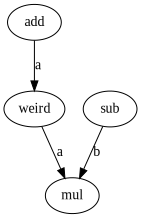

In [34]:
fw.display()

## Publish the (prospective) workflow
Now that you have a workflow, you may already publish the prospective provenance as a series of nanopublications:

In [39]:
fw.publish_as_nanopub(publish_steps=True)

Published to http://purl.org/np/RA0aPiLioTcnvgSQTBOr4VgsoKHe8jRzhE8I0Braf0PZU
Published concept to http://purl.org/np/RA0aPiLioTcnvgSQTBOr4VgsoKHe8jRzhE8I0Braf0PZU#step
Published to http://purl.org/np/RAUD73eDV5bvUFyu2H10CGaQJXZKA6Z7_5xYiLVn1_GBo
Published concept to http://purl.org/np/RAUD73eDV5bvUFyu2H10CGaQJXZKA6Z7_5xYiLVn1_GBo#step
Published to http://purl.org/np/RAnIr_BMXGr0fwxrgxTFQT8o6IR1CDLvE3SlwfMvM7XWo
Published concept to http://purl.org/np/RAnIr_BMXGr0fwxrgxTFQT8o6IR1CDLvE3SlwfMvM7XWo#step
Published to http://purl.org/np/RA-570DvvqBM1jPfkw1FC5Sso-8bYEUwQvPihSBR7UuBI
Published concept to http://purl.org/np/RA-570DvvqBM1jPfkw1FC5Sso-8bYEUwQvPihSBR7UuBI#step
Published to http://purl.org/np/RA8BI-EkivDD5lUXlibWJ_FtKbSECiO5_EAyN0jNbWmwQ
Published concept to http://purl.org/np/RA8BI-EkivDD5lUXlibWJ_FtKbSECiO5_EAyN0jNbWmwQ#plan


{'nanopub_uri': 'http://purl.org/np/RA8BI-EkivDD5lUXlibWJ_FtKbSECiO5_EAyN0jNbWmwQ',
 'concept_uri': 'http://purl.org/np/RA8BI-EkivDD5lUXlibWJ_FtKbSECiO5_EAyN0jNbWmwQ#plan'}

## Execute your workflow using .execute()
You can now execute your workflow. This workflow took three input parameters, so we must provide these are arguments to its `execute()` method.

In [41]:
result, prov = fw.execute(1, 4, 3)
result

-66

### Retrospective prov
Notice that `execute()` does not return only the result of the execution, but also the retrospective provenance for that execution.

In [45]:
type(prov)

fairworkflows.prov.WorkflowRetroProv

### Retrospective prov for each step
You can iterate through a WorkflowRetroProv object to get the StepRetroProv objects for each step. Print these to see the RDF they contain (input/output variable values, start and end datetime of the step's execution etc.) 

In [46]:
for sp in prov:
    print(sp)

Step retrospective provenance.
@prefix pplan: <http://purl.org/net/p-plan#> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

[] a pplan:Activity ;
    pplan:correspondsToStep <http://purl.org/np/RAUD73eDV5bvUFyu2H10CGaQJXZKA6Z7_5xYiLVn1_GBo#step> ;
    prov:endedAtTime "2021-03-16T13:08:38.116421"^^xsd:dateTime ;
    prov:startedAtTime "2021-03-16T13:08:38.116414"^^xsd:dateTime ;
    prov:used [ a pplan:Entity ;
            rdfs:label "a" ;
            pplan:correspondsToVariable <http://purl.org/np/RAUD73eDV5bvUFyu2H10CGaQJXZKA6Z7_5xYiLVn1_GBo#a> ;
            rdf:value 1 ],
        [ a pplan:Entity ;
            rdfs:label "b" ;
            pplan:correspondsToVariable <http://purl.org/np/RAUD73eDV5bvUFyu2H10CGaQJXZKA6Z7_5xYiLVn1_GBo#b> ;
            rdf:value 4 ],
        [ a pplan:Entity ;
            rdfs:label "out1"

### Publish the retrospective provenance
You can use the .publish_as_nanopub() method as with FairStep and FairWorkflow objects. This publishes a nanopub per step and one for the whole workflow, mirroring the prospective RDF.

In [47]:
prov.publish_as_nanopub()

Published to http://purl.org/np/RAFUvzQQA0rXH38zpxZ9LQCme9dq2ZTMy9PqGCNvVkWD4
Published concept to http://purl.org/np/RAFUvzQQA0rXH38zpxZ9LQCme9dq2ZTMy9PqGCNvVkWD4#fairstepprov
Published to http://purl.org/np/RAKklCNBHdYcj7cRTT8TurQM5_KWDhBdsrSuImfKOvueY
Published concept to http://purl.org/np/RAKklCNBHdYcj7cRTT8TurQM5_KWDhBdsrSuImfKOvueY#fairstepprov
Published to http://purl.org/np/RANgAC9MEtNJWdZxsj8MH2LF16WuQiIY6z5phugvkMIsM
Published concept to http://purl.org/np/RANgAC9MEtNJWdZxsj8MH2LF16WuQiIY6z5phugvkMIsM#fairstepprov
Published to http://purl.org/np/RAVhvgS-qn8qkWgY70apL4rX0LnVZDj7Tl_BjdinbI4Sg
Published concept to http://purl.org/np/RAVhvgS-qn8qkWgY70apL4rX0LnVZDj7Tl_BjdinbI4Sg#fairstepprov
Published to http://purl.org/np/RAPQx6lpWHCuicqaxRvivlA_PLwgO6WA_CNNGM4Pqz1jc
Published concept to http://purl.org/np/RAPQx6lpWHCuicqaxRvivlA_PLwgO6WA_CNNGM4Pqz1jc#fairworkflowprov


{'nanopub_uri': 'http://purl.org/np/RAPQx6lpWHCuicqaxRvivlA_PLwgO6WA_CNNGM4Pqz1jc',
 'concept_uri': 'http://purl.org/np/RAPQx6lpWHCuicqaxRvivlA_PLwgO6WA_CNNGM4Pqz1jc#fairworkflowprov'}

The last nanopub (whose URI ends in #fairworkflowprov) contains the links to all of the individual step retrospective provenances.

## Provide semantic annotations for input and output variables
If you wish to specify semantic types for the inputs/outputs to a step, you can do so in the arguments to the decorator.
For example, if you have an input parameter 'a', you can write a='http://www.example.org/distance' to assign that (semantic) type to a. As output of functions is not named in python, you can specify the same but with 'out1', 'out2' etc. See the following example:

In [16]:
@is_fairstep(label='Addition', a='http://www.example.org/distance', returns='http://www.example.org/mass')
def add(a:float, b:float) -> float:
    return a + b

If we now look at the RDF generated for the step, we will see that input parameter 'a' and the step output ('out1') both have the (additional) semantic types specified.

In [17]:
# ACTIONS:
# Add language and version to nanopubs (i.e. what the description is written in)
print(add._fairstep)

Step URI = http://www.example.org/unpublished-add
@prefix bpmn: <http://dkm.fbk.eu/index.php/BPMN2_Ontology#> .
@prefix dc: <http://purl.org/dc/terms/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix pplan: <http://purl.org/net/p-plan#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <https://schema.org/> .

_:N55c6db2a96b4414499dd088141690acb {
    [] a bpmn:ScriptTask,
            pplan:Step ;
        rdfs:label "Addition" ;
        dc:description """@is_fairstep(label='Addition', a='http://www.example.org/distance', returns='http://www.example.org/mass')
def add(a:float, b:float) -> float:
    return a + b
""" ;
        dc:language [ a schema:ComputerLanguage ;
                rdfs:label "python" ;
                rdfs:seeAlso <https://www.wikidata.org/wiki/Q28865> ;
                owl:versionInfo "3.7.9.final.0" ] ;
        pplan:hasInputVar [ a pplan:Variable,
                    <http://www.example.org/distance> ;
                rdfs:label "a

### Specify more than one semantic type for a parameter
You can provide a list of URIs if you want to specify several semantic types for e.g. parameter 'a':

In [18]:
@is_fairstep(label='Addition', a=['http://www.example.org/distance', 'http://www.example.org/number'])
def another_step(a:float, b:float) -> float:
    """Add two numbers together"""
    return a + b

In [19]:
print(another_step._fairstep)

Step URI = http://www.example.org/unpublished-another_step
@prefix bpmn: <http://dkm.fbk.eu/index.php/BPMN2_Ontology#> .
@prefix dc: <http://purl.org/dc/terms/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix pplan: <http://purl.org/net/p-plan#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <https://schema.org/> .

_:Nab534dffa6f1415cbbd25881f8d8e11d {
    [] a bpmn:ScriptTask,
            pplan:Step ;
        rdfs:label "Addition" ;
        dc:description """@is_fairstep(label='Addition', a=['http://www.example.org/distance', 'http://www.example.org/number'])
def another_step(a:float, b:float) -> float:
    \"\"\"Add two numbers together\"\"\"
    return a + b
""" ;
        dc:language [ a schema:ComputerLanguage ;
                rdfs:label "python" ;
                rdfs:seeAlso <https://www.wikidata.org/wiki/Q28865> ;
                owl:versionInfo "3.7.9.final.0" ] ;
        pplan:hasInputVar [ a pplan:Variable,
                    <http://ww

You can check the programming language that was used for writing the step:

In [19]:
print(another_step._fairstep.language)

LinguisticSystem with type=https://schema.org/ComputerLanguage, label=python, seeAlso=https://www.wikidata.org/wiki/Q28865, versionInfo=3.7.9.final.0


## Semantic types for function producing multiple outputs
Provide 'out' with a tuple of the same length as the number of function outputs. You can use None for any you do not wish to assign a particular semantic type to.

In [20]:
from typing import Tuple
@is_fairstep(label='Addition and subtraction', returns=('http://www.example.org/distance', 'http://www.example.org/number'))
def another_step(a:float, b:float) -> Tuple[float, float]:
    return a + b, a - b

In [21]:
print(another_step._fairstep)

Step URI = http://www.example.org/unpublished-another_step
@prefix bpmn: <http://dkm.fbk.eu/index.php/BPMN2_Ontology#> .
@prefix dc: <http://purl.org/dc/terms/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix pplan: <http://purl.org/net/p-plan#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <https://schema.org/> .

_:N1345fcd9251f4f8b86ee8e59bbab507d {
    [] a bpmn:ScriptTask,
            pplan:Step ;
        rdfs:label "Addition and subtraction" ;
        dc:description """@is_fairstep(label='Addition and subtraction', returns=('http://www.example.org/distance', 'http://www.example.org/number'))
def another_step(a:float, b:float) -> Tuple[float, float]:
    return a + b, a - b
""" ;
        dc:language [ a schema:ComputerLanguage ;
                rdfs:label "python" ;
                rdfs:seeAlso <https://www.wikidata.org/wiki/Q28865> ;
                owl:versionInfo "3.7.9.final.0" ] ;
        pplan:hasInputVar [ a pplan:Variable ;
           

As before, you may provide a list of URIs for each output. If you do not want to provide semantic types for a particular output, simply pass None:

In [22]:
from typing import Tuple
@is_fairstep(label='Addition and subtraction', returns=(['http://www.example.org/distance', 'http://www.example.org/number'], None))
def another_step(a:float, b:float) -> Tuple[float, float]:
    """This step returns an addition and a subtraction of its inputs"""
    return a + b, a - b

In [23]:
print(another_step._fairstep)

Step URI = http://www.example.org/unpublished-another_step
@prefix bpmn: <http://dkm.fbk.eu/index.php/BPMN2_Ontology#> .
@prefix dc: <http://purl.org/dc/terms/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix pplan: <http://purl.org/net/p-plan#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <https://schema.org/> .

_:Nd65e996b1d9546a4899eaff4131e159f {
    [] a bpmn:ScriptTask,
            pplan:Step ;
        rdfs:label "Addition and subtraction" ;
        dc:description """@is_fairstep(label='Addition and subtraction', returns=(['http://www.example.org/distance', 'http://www.example.org/number'], None))
def another_step(a:float, b:float) -> Tuple[float, float]:
    \"\"\"This step returns an addition and a subtraction of its inputs\"\"\"
    return a + b, a - b
""" ;
        dc:language [ a schema:ComputerLanguage ;
                rdfs:label "python" ;
                rdfs:seeAlso <https://www.wikidata.org/wiki/Q28865> ;
                owl:vers